In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('anemia prediction.csv')

In [3]:
df.shape

(104, 7)

In [4]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [6]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [7]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [8]:
df_num=df.select_dtypes(include=np.number).columns.to_list()

In [9]:
df_num

['Number', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']

In [10]:
df_cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [11]:
df_cat

['Sex', 'Anaemic']

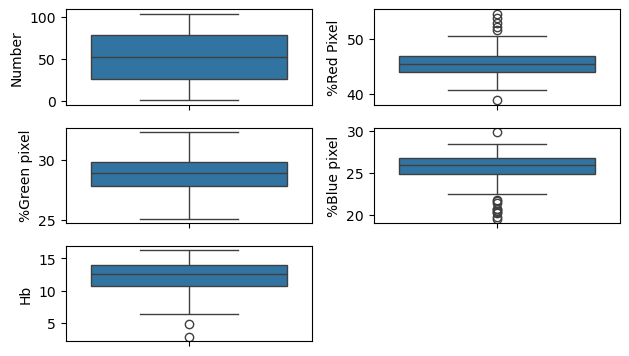

In [12]:
t=1
for i in df_num:
    #plt.figure(figsize=[3,3])
    plt.subplot(4,2,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()    
plt.show()

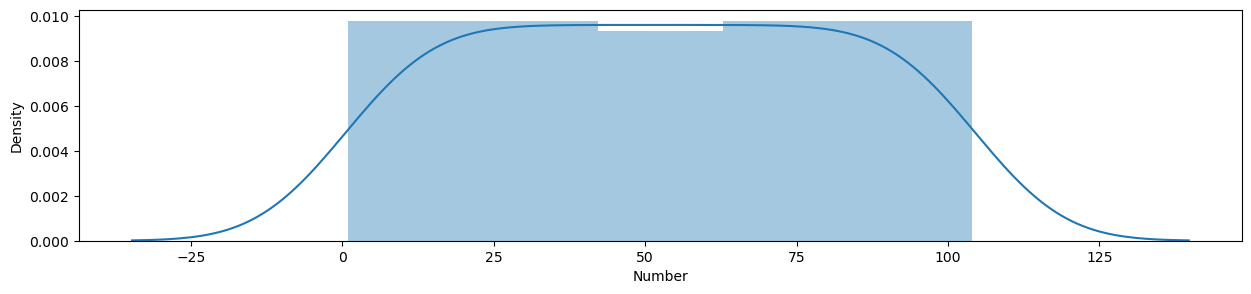

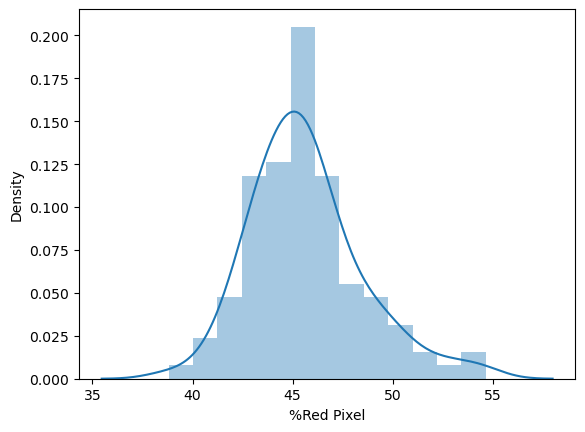

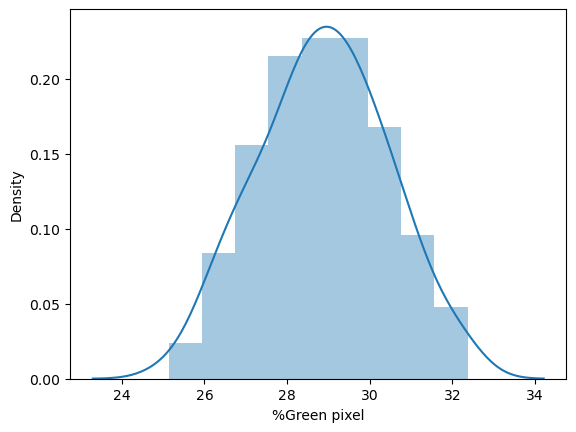

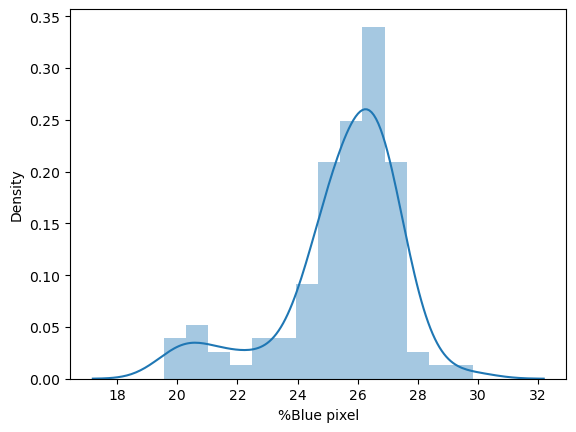

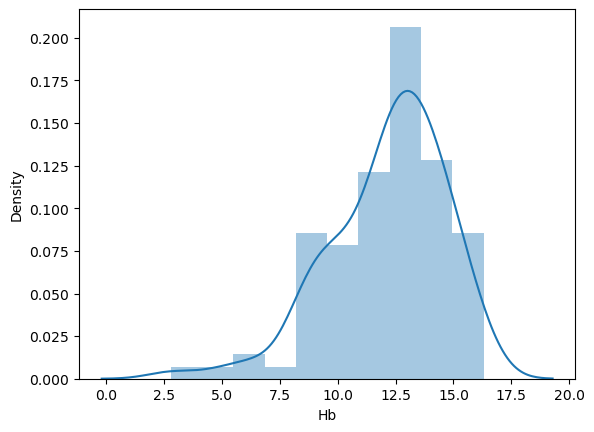

In [13]:
plt.figure(figsize=[15,3])
for i in df_num:
    sns.distplot(df[i])
    plt.show()

In [14]:
plt.figure(figsize=[15,3])
for i in df_num:
    print(i,df[i].skew())
    print('****')
    

Number 0.0
****
%Red Pixel 0.7653605815340452
****
%Green pixel -0.019613466825446086
****
%Blue pixel -1.2894193254506294
****
Hb -0.9508943518288202
****


<Figure size 1500x300 with 0 Axes>

In [15]:
for i in df_cat:
    print(df[i].value_counts())
    print('*********************************')

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64
*********************************
Anaemic
No     78
Yes    26
Name: count, dtype: int64
*********************************


In [16]:
df['Sex'].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

In [17]:
## There is anomalies  in the column

In [18]:
df['Sex']=df['Sex'].replace('F ','F')

In [19]:
df['Sex'].unique()

array(['M', 'F', 'M '], dtype=object)

In [20]:
df['Sex']=df['Sex'].replace('M ','M')

In [21]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [22]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


<Axes: >

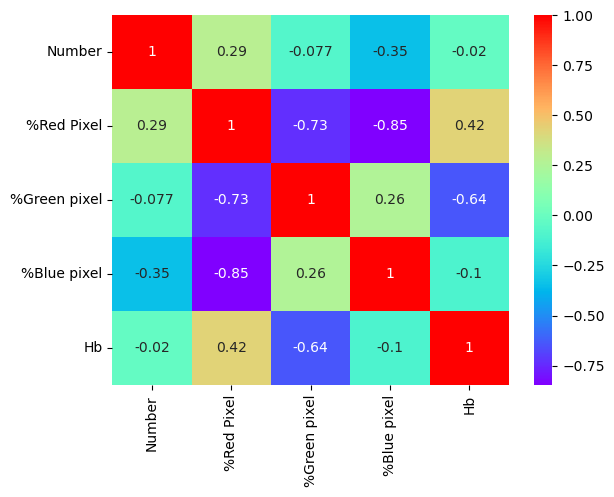

In [23]:
sns.heatmap(df[df_num].corr(),annot=True,cmap='rainbow')

<Axes: xlabel='Anaemic', ylabel='Hb'>

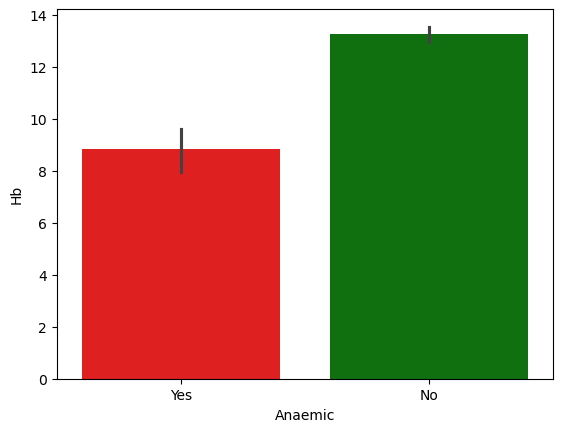

In [24]:
sns.barplot(y=df['Hb'],x=df['Anaemic'],palette=['r','g'])

<Axes: xlabel='Anaemic', ylabel='%Red Pixel'>

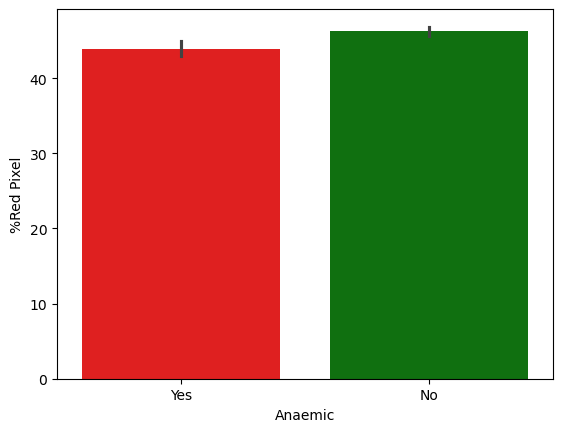

In [25]:
sns.barplot(y=df['%Red Pixel'],x=df['Anaemic'],palette=['r','g'])

<Axes: xlabel='Anaemic', ylabel='%Green pixel'>

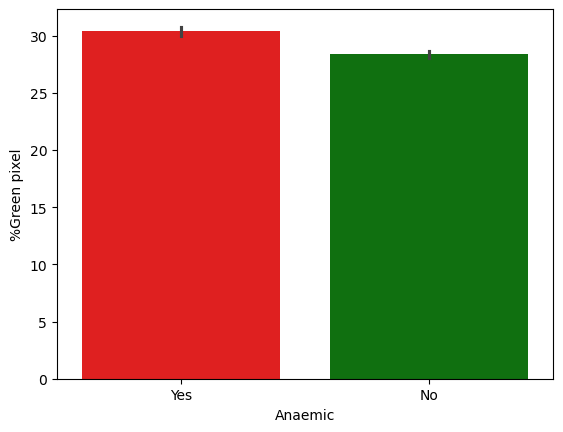

In [26]:
sns.barplot(y=df['%Green pixel'],x=df['Anaemic'],palette=['r','g'])

<Axes: xlabel='Anaemic', ylabel='%Blue pixel'>

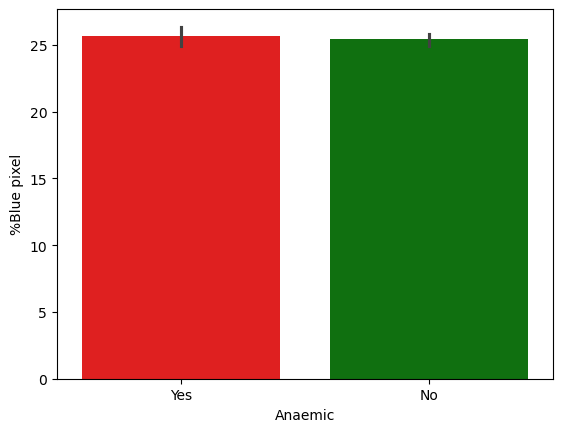

In [27]:
sns.barplot(y=df['%Blue pixel'],x=df['Anaemic'],palette=['r','g'])

<Axes: xlabel='Sex', ylabel='count'>

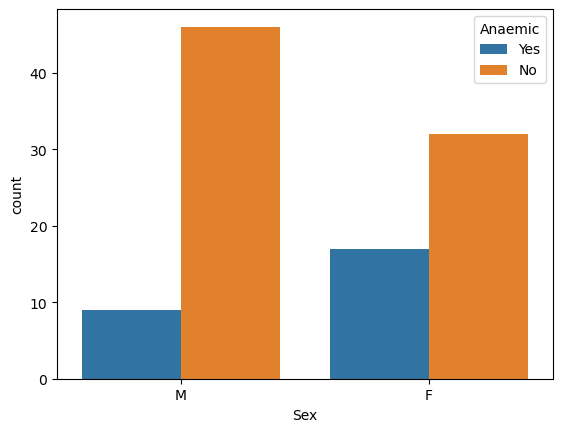

In [28]:
sns.countplot(x=df['Sex'],hue=df['Anaemic'])

In [29]:
pd.crosstab(index=df['Sex'],columns=df['Anaemic'])

Anaemic,No,Yes
Sex,,
F,32,17
M,46,9


In [30]:
from scipy import stats

In [31]:
yes=df[df['Anaemic']=='Yes']['%Red Pixel']
no=df[df['Anaemic']=='No']['%Red Pixel']
print(stats.ttest_ind(yes,no))
print(stats.f_oneway(yes,no))

TtestResult(statistic=-3.815065245895496, pvalue=0.00023355792260973485, df=102.0)
F_onewayResult(statistic=14.554722830439673, pvalue=0.00023355792260973306)


In [32]:
yes=df[df['Anaemic']=='Yes']['%Blue pixel']
no=df[df['Anaemic']=='No']['%Blue pixel']
print(stats.ttest_ind(yes,no))
print(stats.f_oneway(yes,no))

TtestResult(statistic=0.5851732525539101, pvalue=0.559723569556456, df=102.0)
F_onewayResult(statistic=0.3424277355045104, pvalue=0.5597235695564602)


In [33]:
yes=df[df['Anaemic']=='Yes']['%Green pixel']
no=df[df['Anaemic']=='No']['%Green pixel']
print(stats.ttest_ind(yes,no))
print(stats.f_oneway(yes,no))

TtestResult(statistic=6.941936293138544, pvalue=3.6713494916110287e-10, df=102.0)
F_onewayResult(statistic=48.19047949799378, pvalue=3.6713494916114087e-10)


In [34]:
yes=df[df['Anaemic']=='Yes']['Hb']
no=df[df['Anaemic']=='No']['Hb']
print(stats.ttest_ind(yes,no))
print(stats.f_oneway(yes,no))

TtestResult(statistic=-12.053704732638924, pvalue=2.4779272293888157e-21, df=102.0)
F_onewayResult(statistic=145.29179778164217, pvalue=2.4779272293887e-21)


In [35]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [36]:
##df --- > dropping the number column
from scipy.stats import chi2_contingency

In [37]:
obs=pd.crosstab(index=df['Sex'],columns=df['Anaemic'])
obs

Anaemic,No,Yes
Sex,,
F,32,17
M,46,9


In [38]:
chi2, p, dof, expected = chi2_contingency(obs)
chi2,p,dof,expected

(3.717501546072975,
 0.0538448840574718,
 1,
 array([[36.75, 12.25],
        [41.25, 13.75]]))

In [39]:
x=df.drop(['Number','Anaemic'],axis=1)
y=df[['Anaemic']]

In [40]:
x_final=pd.get_dummies(data=x,drop_first=True,dtype='int')
x_final

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Sex_M
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,1
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,0
100,42.2324,30.6757,27.0919,6.3,1
101,45.6064,31.9084,22.4852,12.7,0
102,45.2095,29.2769,25.5136,13.4,1


In [41]:
y['Anaemic'].replace('No',0,inplace=True)
y['Anaemic'].replace('Yes',1,inplace=True)
y

,Anaemic
0,1
1,0
2,0
3,0
4,0
...,...
99,1
100,1
101,0
102,0


In [42]:
x_final.isnull().sum()

%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Sex_M           0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_final,y,test_size=0.3,stratify=y,random_state=10)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((72, 5), (32, 5), (72, 1), (32, 1))

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=['%Red Pixel','%Green pixel','%Blue pixel','Hb']
xtrain[scale]=sc.fit_transform(xtrain[scale])
xtrain.isnull().sum()

%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Sex_M           0
dtype: int64

In [45]:
xtest[scale]=sc.fit_transform(xtest[scale])
xtest

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Sex_M
21,-0.904267,0.824996,0.668118,0.076788,0
76,1.143890,0.288286,-1.761187,-0.982352,0
49,-0.186678,-0.558707,0.639351,-0.219771,1
14,0.281873,-1.642024,0.744166,1.008830,1
61,-0.357375,0.865703,-0.107105,-0.939986,0
23,0.495410,-1.150045,0.114050,1.220658,0
70,-0.646230,0.625157,0.452998,-0.431599,0
86,0.216683,-0.238594,-0.131970,0.754637,1
22,-0.944318,0.851122,0.704917,-0.050309,0
45,0.264804,-0.868594,0.235563,0.458078,1


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model1=rf.fit(xtrain,ytrain)

In [47]:
ypred=model1.predict(xtest)

In [48]:
ypred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [49]:
from sklearn.metrics import *
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.89      1.00      0.94         8

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



In [50]:
confusion_matrix(ytest,ypred)

array([[23,  1],
       [ 0,  8]], dtype=int64)

In [51]:
import statsmodels.api as sm

In [52]:
xtrain_c=sm.add_constant(xtrain) 
logit=sm.Logit(ytrain,xtrain_c).fit()
logit.summary()

         Current function value: 0.342027
         Iterations: 35


C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Anaemic   No. Observations:                   72
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.3918
Time:                        20:24:37   Log-Likelihood:                -24.626
converged:                      False   LL-Null:                       -40.488
Covariance Type:            nonrobust   LLR p-value:                 6.737e-06
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.3412      6.485     -1.440      0.150     -22.052       3.369
%Red Pixel   -1.904e+05   1.36e+05     -1.400      0.161   -4.57e+05    7.61e+04
%Green pixel -1.093e+05   7.81e+04     -1.400      0.161   -2.62e+05    4.37e+04
%Blue pixel  -1.323e+05   9.45e+04     -1.400      0.161   -3.18e+05    5.29e+04
Hb             -15.4169     11.075     -1.392      0.164     -37.123       6.289
Sex_M           -2.9052      3.717     -0.782      0.434     -10.191       4.380
================================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
ypred=LR.predict(xtest)

In [56]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.89      1.00      0.94         8

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



In [57]:
print(confusion_matrix(ytest,ypred))

[[23  1]
 [ 0  8]]


In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=3)
gbc.fit(xtrain,ytrain)


GradientBoostingClassifier()

In [59]:
ypred=gbc.predict(xtest)

In [60]:
print(confusion_matrix(ytest,ypred))

[[23  1]
 [ 0  8]]


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=4)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)

In [63]:
ypred=dt.predict(xtest)
print(confusion_matrix(ytest,ypred))

[[23  1]
 [ 0  8]]


In [64]:
from sklearn.linear_model import RidgeClassifier
rc=RidgeClassifier(alpha=0.7,)
rc.fit(xtrain,ytrain)

RidgeClassifier(alpha=0.7)

In [65]:
ypred=rc.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[23  1]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.89      1.00      0.94         8

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32

